In [15]:
import yfinance as yf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

import datetime

In [16]:
today = datetime.date.today()

In [17]:
data = yf.download('TSLA', start='2010-01-01', end=today)
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [18]:
df = data[['Close']]

dataset = df.values

# Normalize data (scale between 0 and 1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [19]:
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data)-look_back-1):
        X.append(data[i:(i+look_back), 0])
        Y.append(data[i+look_back, 0])
    return np.array(X), np.array(Y)

look_back = 60  # Use last 60 days to predict next day
X, y = create_dataset(scaled_data, look_back)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split into train and test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [20]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error',)

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

c:\Users\PMYLS\Downloads\Machine-Learning-Projects\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - loss: 0.0083 - val_loss: 0.0025
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - loss: 9.5017e-04 - val_loss: 0.0022
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - loss: 9.8940e-04 - val_loss: 0.0022
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - loss: 7.4707e-04 - val_loss: 0.0018
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - loss: 7.6061e-04 - val_loss: 0.0021
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - loss: 6.3491e-04 - val_loss: 0.0018
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - loss: 6.5065e-04 - val_loss: 0.0016
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - loss: 5.0401e-04 - val_loss: 0.0026
Epoch 9/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 5.8168e-04 - val_loss: 0.0017
Epoch 10/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - loss: 6.2219e-04 - val_loss: 0.0020
Epoch 11/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - loss: 6.3236e-04 - val_loss: 0.0014
Epoch 12/20

116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step


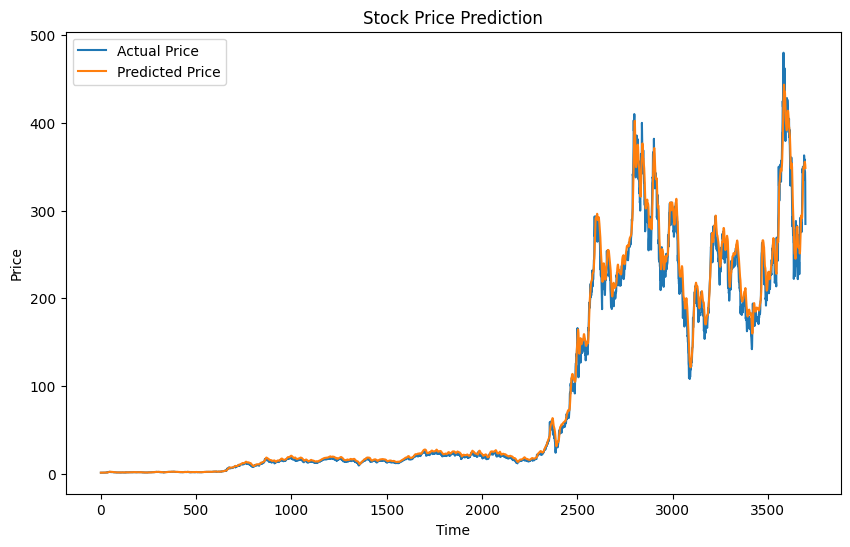

In [21]:
# Predict
train_predict = model.predict(X)

# Inverse transform to original scale
train_predict = scaler.inverse_transform(train_predict)
actual = scaler.inverse_transform([y])

# Plot results
plt.figure(figsize=(10,6))
plt.plot(actual[0], label='Actual Price')
plt.plot(train_predict[:,0], label='Predicted Price')
plt.legend()
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [22]:
last_60_days = scaled_data[-look_back:]
next_input = last_60_days.reshape(1, look_back, 1)
next_price = model.predict(next_input)
print("Tomorrow's Predicted Price:", scaler.inverse_transform(next_price)[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Tomorrow's Predicted Price: 326.0942
